In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Load solution data from csv
DF4oCM = pd.read_csv('Marking files/4o self marked - CM.csv')
DF4oQM = pd.read_csv('Marking files/4o self marked - QM.csv')
DF4oEM = pd.read_csv('Marking files/4o self marked - EM.csv')

DFG15CM = pd.read_csv('Marking files/1.5 self marked - CM.csv')
DFG15QM = pd.read_csv('Marking files/1.5 self marked - QM.csv')
DFG15EM = pd.read_csv('Marking files/1.5 self marked - EM.csv')

DFo1CM = pd.read_csv('Marking files/o1 self marked - CM.csv')
DFo1QM = pd.read_csv('Marking files/o1 self marked - QM.csv')
DFo1EM = pd.read_csv('Marking files/o1 self marked - EM.csv')

DFG20CM = pd.read_csv('Marking files/Gemini 2.0 self marked - CM.csv')
DFG20QM = pd.read_csv('Marking files/Gemini 2.0 self marked - QM.csv')
DFG20EM = pd.read_csv('Marking files/Gemini 2.0 self marked - EM.csv')

DFDSR1CM = pd.read_csv('Marking files/Deepseek self marked - CM.csv')
DFDSR1QM = pd.read_csv('Marking files/Deepseek self marked - QM.csv')
DFDSR1EM = pd.read_csv('Marking files/Deepseek self marked - EM.csv')

DFo3CM = pd.read_csv('Marking files/GPTo3 self marked - CM.csv')
DFo3QM = pd.read_csv('Marking files/GPTo3 self marked - QM.csv')
DFo3EM = pd.read_csv('Marking files/GPTo3 self marked - EM.csv')

In [18]:
DF4oCM.head(6)
#DF4oQM.head(6)
#DF4oEM.head(6)

,Question Number,Available Marks,Solution 1,Solution 2,Solution 3,without MS - Sol 1,without MS - Sol 2,without MS - Sol 3,with MS - Sol 1,with MS - Sol 2,with MS - Sol 3,Response with Prompt,Response without Prompt
0,2,6,5,5,5,6,6,6.0,6,6,6.0,6,6
1,5,9,9,9,3,9,9,6.5,9,9,6.5,9,8
2,7,13,13,11,9,13,13,12.5,13,13,12.5,11,11
3,8,10,6,6,6,10,10,9.0,10,10,9.5,8,8
4,9,7,7,7,7,7,7,7.0,7,7,7.0,7,7
5,10,8,8,8,8,8,8,8.0,8,8,8.0,8,8


In [19]:
# Extract human marked data
HumanCM_solution1 = DF4oCM.iloc[0:6, 2].astype(int)
HumanCM_solution2 = DF4oCM.iloc[0:6, 3].astype(int)
HumanCM_solution3 = DF4oCM.iloc[0:6, 4].astype(int)

HumanQM_solution1 = DF4oQM.iloc[0:6, 2].astype(int)
HumanQM_solution2 = DF4oQM.iloc[0:6, 3].astype(int)
HumanQM_solution3 = DF4oQM.iloc[0:6, 4].astype(int)

HumanEM_solution1 = DF4oEM.iloc[0:6, 2].astype(int)
HumanEM_solution2 = DF4oEM.iloc[0:6, 3].astype(int)
HumanEM_solution3 = DF4oEM.iloc[0:6, 4].astype(int)

# Extarct total number of marks per question
CM_marks = DF4oCM.iloc[0:6, 1].astype(int)
QM_marks = DF4oQM.iloc[0:6, 1].astype(int)
EM_marks = DF4oEM.iloc[0:6, 1].astype(int)


In [20]:
# Extract AI marked data
def LLM_grades(DF):
    woms1 = DF.iloc[0:6, 5].astype(float)
    woms2 = DF.iloc[0:6, 6].astype(float)
    woms3 = DF.iloc[0:6, 7].astype(float)

    wms1 = DF.iloc[0:6, 8].astype(float)
    wms2 = DF.iloc[0:6, 9].astype(float)
    wms3 = DF.iloc[0:6, 10].astype(float)
    return (woms1, woms2, woms3, wms1, wms2, wms3)

LLM4oCM = LLM_grades(DF4oCM)
LLM4oQM = LLM_grades(DF4oQM)
LLM4oEM = LLM_grades(DF4oEM)

LLMG15CM = LLM_grades(DFG15CM)
LLMG15QM = LLM_grades(DFG15QM)
LLMG15EM = LLM_grades(DFG15EM)

LLMo1CM = LLM_grades(DFo1CM)
LLMo1QM = LLM_grades(DFo1QM)
LLMo1EM = LLM_grades(DFo1EM)

LLMG20CM = LLM_grades(DFG20CM)
LLMG20QM = LLM_grades(DFG20QM)
LLMG20EM = LLM_grades(DFG20EM)

LLMDSR1CM = LLM_grades(DFDSR1CM)
LLMDSR1QM = LLM_grades(DFDSR1QM)
LLMDSR1EM = LLM_grades(DFDSR1EM)

LLMo3CM = LLM_grades(DFo3CM)
LLMo3QM = LLM_grades(DFo3QM)
LLMo3EM = LLM_grades(DFo3EM)

print(LLM4oCM[0])

0     6.0
1     9.0
2    13.0
3    10.0
4     7.0
5     8.0
Name: without MS - Sol 1, dtype: float64


In [21]:
# get relevant percentages
def get_percentage(DF,total_marks):
    perc1 = np.zeros(6)
    perc2 = np.zeros(6)
    perc3 = np.zeros(6)
    perc4 = np.zeros(6)
    perc5 = np.zeros(6)
    perc6 = np.zeros(6)
    for i in range(0, 6):
        perc1[i] = (DF[0][i] / total_marks[i]) * 100
        perc2[i] = (DF[1][i] / total_marks[i]) * 100
        perc3[i] = (DF[2][i] / total_marks[i]) * 100
        perc4[i] = (DF[3][i] / total_marks[i]) * 100
        perc5[i] = (DF[4][i] / total_marks[i]) * 100
        perc6[i] = (DF[5][i] / total_marks[i]) * 100

    return (perc1, perc2, perc3, perc4, perc5, perc6) 

In [22]:
# get all percentages

HumanCM_perc1 = HumanCM_solution1 / CM_marks * 100
HumanCM_perc2 = HumanCM_solution2 / CM_marks * 100
HumanCM_perc3 = HumanCM_solution3 / CM_marks * 100

HumanQM_perc1 = HumanQM_solution1 / QM_marks * 100
HumanQM_perc2 = HumanQM_solution2 / QM_marks * 100
HumanQM_perc3 = HumanQM_solution3 / QM_marks * 100

HumanEM_perc1 = HumanEM_solution1 / EM_marks * 100
HumanEM_perc2 = HumanEM_solution2 / EM_marks * 100
HumanEM_perc3 = HumanEM_solution3 / EM_marks * 100

HumanCM_perc = (HumanCM_perc1, HumanCM_perc2, HumanCM_perc3)
HumanQM_perc = (HumanQM_perc1, HumanQM_perc2, HumanQM_perc3)
HumanEM_perc = (HumanEM_perc1, HumanEM_perc2, HumanEM_perc3)

print(HumanCM_perc[0])

LLM4oCM_perc = get_percentage(LLM4oCM, CM_marks)
LLM4oQM_perc = get_percentage(LLM4oQM, QM_marks)
LLM4oEM_perc = get_percentage(LLM4oEM, EM_marks)

LLMG15CM_perc = get_percentage(LLMG15CM, CM_marks)
LLMG15QM_perc = get_percentage(LLMG15QM, QM_marks)
LLMG15EM_perc = get_percentage(LLMG15EM, EM_marks)

LLMo1CM_perc = get_percentage(LLMo1CM, CM_marks)
LLMo1QM_perc = get_percentage(LLMo1QM, QM_marks)
LLMo1EM_perc = get_percentage(LLMo1EM, EM_marks)

LLMG20CM_perc = get_percentage(LLMG20CM, CM_marks)
LLMG20QM_perc = get_percentage(LLMG20QM, QM_marks)
LLMG20EM_perc = get_percentage(LLMG20EM, EM_marks)

LLMDSR1CM_perc = get_percentage(LLMDSR1CM, CM_marks)
LLMDSR1QM_perc = get_percentage(LLMDSR1QM, QM_marks)
LLMDSR1EM_perc = get_percentage(LLMDSR1EM, EM_marks)

LLMo3CM_perc = get_percentage(LLMo3CM, CM_marks)
LLMo3QM_perc = get_percentage(LLMo3QM, QM_marks)
LLMo3EM_perc = get_percentage(LLMo3EM, EM_marks)

print(LLMo3CM_perc[0])

0     83.333333
1    100.000000
2    100.000000
3     60.000000
4    100.000000
5    100.000000
dtype: float64
[100. 100. 100.  80. 100. 100.]


In [23]:
# Linear regression plot of LLM vs human w/o mark scheme

# get percentage difference. 
def get_diff(LLM, human):
    diff1 = LLM[0] - human[0]
    diff2 = LLM[1] - human[1]
    diff3 = LLM[2] - human[2]

    diff4 = LLM[3] - human[0]
    diff5 = LLM[4] - human[1]
    diff6 = LLM[5] - human[2]
    return (diff1, diff2, diff3, diff4, diff5, diff6)

# get all differences
LLM4oCM_diff = get_diff(LLM4oCM_perc, HumanCM_perc)
LLM4oQM_diff = get_diff(LLM4oQM_perc, HumanQM_perc)
LLM4oEM_diff = get_diff(LLM4oEM_perc, HumanEM_perc)

LLMG15CM_diff = get_diff(LLMG15CM_perc, HumanCM_perc)
LLMG15QM_diff = get_diff(LLMG15QM_perc, HumanQM_perc)
LLMG15EM_diff = get_diff(LLMG15EM_perc, HumanEM_perc)

LLMo1CM_diff = get_diff(LLMo1CM_perc, HumanCM_perc)
LLMo1QM_diff = get_diff(LLMo1QM_perc, HumanQM_perc)
LLMo1EM_diff = get_diff(LLMo1EM_perc, HumanEM_perc)

LLMG20CM_diff = get_diff(LLMG20CM_perc, HumanCM_perc)
LLMG20QM_diff = get_diff(LLMG20QM_perc, HumanQM_perc)
LLMG20EM_diff = get_diff(LLMG20EM_perc, HumanEM_perc)

LLMDSR1CM_diff = get_diff(LLMDSR1CM_perc, HumanCM_perc)
LLMDSR1QM_diff = get_diff(LLMDSR1QM_perc, HumanQM_perc)
LLMDSR1EM_diff = get_diff(LLMDSR1EM_perc, HumanEM_perc)

LLMo3CM_diff = get_diff(LLMo3CM_perc, HumanCM_perc)
LLMo3QM_diff = get_diff(LLMo3QM_perc, HumanQM_perc)
LLMo3EM_diff = get_diff(LLMo3EM_perc, HumanEM_perc)


In [24]:
# Plotting linear regression of LLM vs human
from sklearn.metrics import mean_squared_error

def plot_regression(LLM, human, title):

    plt.xlabel('Human Marking')
    plt.ylabel('LLM Marking')

    # Scatter plot of human vs LLM marking
    plt.xlim(0, 100)  # Set x-axis limits
    plt.ylim(0, 100)  # Set y-axis limits

    m, b = np.polyfit(human, LLM, 1)
    x = np.linspace(0, 100, 100)  # Generate x values for the regression line
    plt.plot(x, m * x + b, label=f'{title}') #Plot regression line
    plt.legend()  # Show legend

    plt.title(title)  # Set the title of the plot
    plt.grid(True)  # Add grid for better readability

    y_pred = m * human + b  # Predicted y values
    mse = np.sqrt(mean_squared_error(LLM, human))  # Calculate mean squared error

    return(m, b, mse)  # Return slope, intercept, and MSE

Without Mark Scheme:
ChatGPT-o1: y = 0.23x + 75.75, RMSE = 29.92
ChatGPT-4o: y = 0.24x + 78.44, RMSE = 30.31
Gemini 1.5 pro: y = 0.05x + 87.98, RMSE = 31.72
Gemini 2.0 flash: y = 0.35x + 66.50, RMSE = 27.31
DeepSeekV3-R1: y = 0.28x + 65.72, RMSE = 26.16
ChatGPT-o3-mini-high: y = 0.60x + 38.83, RMSE = 22.85


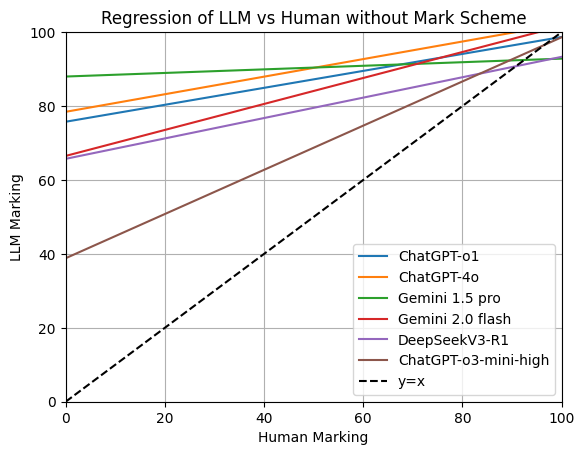

In [25]:
# Flatten and concatenate the data
LLM4oCM_percof_woms = np.concatenate((np.array(LLM4oCM_perc[0:3]).flatten(), np.array(LLM4oEM_perc[0:3]).flatten(), np.array(LLM4oQM_perc[0:3]).flatten()))
LLMG15CM_percof_woms = np.concatenate((np.array(LLMG15CM_perc[0:3]).flatten(), np.array(LLMG15EM_perc[0:3]).flatten(), np.array(LLMG15QM_perc[0:3]).flatten()))
LLMo1_percof_woms = np.concatenate((np.array(LLMo1CM_perc[0:3]).flatten(), np.array(LLMo1EM_perc[0:3]).flatten(), np.array(LLMo1QM_perc[0:3]).flatten()))
LLMG20CM_percof_woms = np.concatenate((np.array(LLMG20CM_perc[0:3]).flatten(), np.array(LLMG20EM_perc[0:3]).flatten(), np.array(LLMG20QM_perc[0:3]).flatten()))
LLMDSR1CM_percof_woms = np.concatenate((np.array(LLMDSR1CM_perc[0:3]).flatten(), np.array(LLMDSR1EM_perc[0:3]).flatten(), np.array(LLMDSR1QM_perc[0:3]).flatten()))
LLMo3CM_percof_woms = np.concatenate((np.array(LLMo3CM_perc[0:3]).flatten(), np.array(LLMo3EM_perc[0:3]).flatten(), np.array(LLMo3QM_perc[0:3]).flatten()))
Human_percof = np.concatenate((np.array(HumanCM_perc).flatten(), np.array(HumanEM_perc).flatten(), np.array(HumanQM_perc).flatten()))

m1, b1, rms1 = plot_regression(LLMo1_percof_woms, Human_percof, 'ChatGPT-o1')
m2, b2, rms2 = plot_regression(LLM4oCM_percof_woms, Human_percof, 'ChatGPT-4o')
m3, b3, rms3 = plot_regression(LLMG15CM_percof_woms, Human_percof, 'Gemini 1.5 pro')
m4, b4, rms4 = plot_regression(LLMG20CM_percof_woms, Human_percof, 'Gemini 2.0 flash')
m5, b5, rms5 = plot_regression(LLMDSR1CM_percof_woms, Human_percof, 'DeepSeekV3-R1')
m6, b6, rms6 = plot_regression(LLMo3CM_percof_woms, Human_percof, 'ChatGPT-o3-mini-high')


# plot y=x line
plt.plot([0, 100], [0, 100], 'k--', label='y=x')  # Diagonal line for reference
plt.xlabel('Human Marking')
plt.ylabel('LLM Marking')
plt.title('Regression of LLM vs Human without Mark Scheme')
plt.legend()
plt.grid(True)

#plt.savefig('LLM_vs_Human_wo_mark_scheme.png', dpi=300, bbox_inches='tight')

# Lines of best fit
print("Without Mark Scheme:")
print(f"ChatGPT-o1: y = {m1:.2f}x + {b1:.2f}, RMSE = {rms1:.2f}")
print(f"ChatGPT-4o: y = {m2:.2f}x + {b2:.2f}, RMSE = {rms2:.2f}")
print(f"Gemini 1.5 pro: y = {m3:.2f}x + {b3:.2f}, RMSE = {rms3:.2f}")
print(f"Gemini 2.0 flash: y = {m4:.2f}x + {b4:.2f}, RMSE = {rms4:.2f}")
print(f"DeepSeekV3-R1: y = {m5:.2f}x + {b5:.2f}, RMSE = {rms5:.2f}")
print(f"ChatGPT-o3-mini-high: y = {m6:.2f}x + {b6:.2f}, RMSE = {rms6:.2f}")




With Mark Scheme:
ChatGPT-o1: y = 0.44x + 57.09, RMSE = 27.66
ChatGPT-4o: y = 0.19x + 81.39, RMSE = 30.87
Gemini 1.5 pro: y = 0.12x + 80.30, RMSE = 33.74
Gemini 2.0 flash: y = 0.61x + 43.87, RMSE = 23.92
DeepSeekV3-R1: y = 0.61x + 34.28, RMSE = 21.04
ChatGPT-o3-mini-high: y = 0.89x + 10.80, RMSE = 16.88


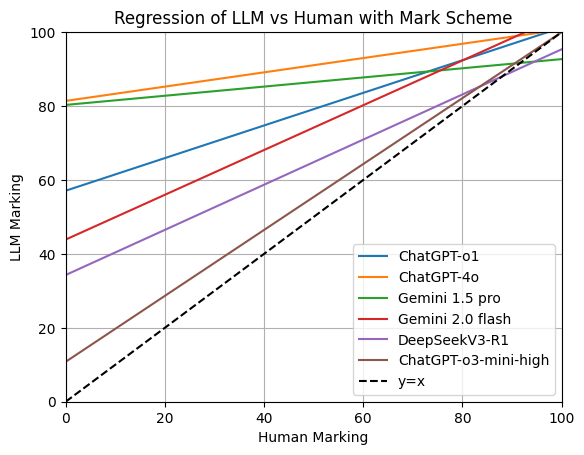

In [26]:
LLM4oCM_percof_ms = np.concatenate((np.array(LLM4oCM_perc[3:6]).flatten(), np.array(LLM4oEM_perc[3:6]).flatten(), np.array(LLM4oQM_perc[3:6]).flatten()))
LLMG15CM_percof_ms = np.concatenate((np.array(LLMG15CM_perc[3:6]).flatten(), np.array(LLMG15EM_perc[3:6]).flatten(), np.array(LLMG15QM_perc[3:6]).flatten()))
LLMo1_percof_ms = np.concatenate((np.array(LLMo1CM_perc[3:6]).flatten(), np.array(LLMo1EM_perc[3:6]).flatten(), np.array(LLMo1QM_perc[3:6]).flatten()))
LLMG20CM_percof_ms = np.concatenate((np.array(LLMG20CM_perc[3:6]).flatten(), np.array(LLMG20EM_perc[3:6]).flatten(), np.array(LLMG20QM_perc[3:6]).flatten()))
LLMDSR1CM_percof_ms = np.concatenate((np.array(LLMDSR1CM_perc[3:6]).flatten(), np.array(LLMDSR1EM_perc[3:6]).flatten(), np.array(LLMDSR1QM_perc[3:6]).flatten()))
LLMo3CM_percof_ms = np.concatenate((np.array(LLMo3CM_perc[3:6]).flatten(), np.array(LLMo3EM_perc[3:6]).flatten(), np.array(LLMo3QM_perc[3:6]).flatten()))

m1, b1, rms1 = plot_regression(LLMo1_percof_ms, Human_percof, 'ChatGPT-o1')
m2, b2, rms2 = plot_regression(LLM4oCM_percof_ms, Human_percof, 'ChatGPT-4o')
m3, b3, rms3 = plot_regression(LLMG15CM_percof_ms, Human_percof, 'Gemini 1.5 pro')
m4, b4, rms4 = plot_regression(LLMG20CM_percof_ms, Human_percof, 'Gemini 2.0 flash')
m5, b5, rms5 = plot_regression(LLMDSR1CM_percof_ms, Human_percof, 'DeepSeekV3-R1')
m6, b6, rms6 = plot_regression(LLMo3CM_percof_ms, Human_percof, 'ChatGPT-o3-mini-high')

# plot y=x line
plt.plot([0, 100], [0, 100], 'k--', label='y=x')  # Diagonal line for reference
plt.xlabel('Human Marking')
plt.ylabel('LLM Marking')
plt.title('Regression of LLM vs Human with Mark Scheme')
plt.legend()
plt.grid(True)
#plt.savefig('LLM_vs_Human_w_mark_scheme.png', dpi=300, bbox_inches='tight')

# Lines of best fit
print("With Mark Scheme:")
print(f"ChatGPT-o1: y = {m1:.2f}x + {b1:.2f}, RMSE = {rms1:.2f}")
print(f"ChatGPT-4o: y = {m2:.2f}x + {b2:.2f}, RMSE = {rms2:.2f}")
print(f"Gemini 1.5 pro: y = {m3:.2f}x + {b3:.2f}, RMSE = {rms3:.2f}")
print(f"Gemini 2.0 flash: y = {m4:.2f}x + {b4:.2f}, RMSE = {rms4:.2f}")
print(f"DeepSeekV3-R1: y = {m5:.2f}x + {b5:.2f}, RMSE = {rms5:.2f}")
print(f"ChatGPT-o3-mini-high: y = {m6:.2f}x + {b6:.2f}, RMSE = {rms6:.2f}")



Text(0, 0.5, 'LLM Marking')

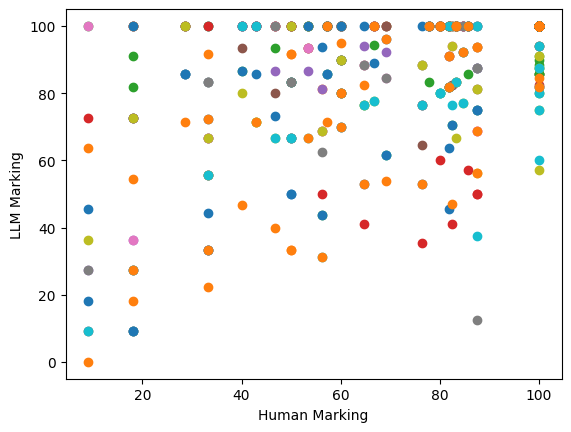

In [29]:
# plotscatter plot of LLM vs human marking

plt.plot(Human_percof, LLM4oCM_percof_woms, 'o', label='ChatGPT-4ocm')
plt.plot(Human_percof, LLM4oCM_percof_ms, 'o', label='ChatGPT-4ocm with MS')
plt.plot(Human_percof, LLMG15CM_percof_woms, 'o', label='Gemini 1.5cm pro')
plt.plot(Human_percof, LLMG15CM_percof_ms, 'o', label='Gemini 1.5cm pro with MS')
plt.plot(Human_percof, LLMG20CM_percof_woms, 'o', label='Gemini 2.0cm flash')
plt.plot(Human_percof, LLMG20CM_percof_ms, 'o', label='Gemini 2.0cm flash with MS')
plt.plot(Human_percof, LLMo1_percof_woms, 'o', label='ChatGPT-o1')
plt.plot(Human_percof, LLMo1_percof_ms, 'o', label='ChatGPT-o1 with MS')
plt.plot(Human_percof, LLMDSR1CM_percof_woms, 'o', label='DeepSeekV3-R1')
plt.plot(Human_percof, LLMDSR1CM_percof_ms, 'o', label='DeepSeekV3-R1 with MS')
plt.plot(Human_percof, LLMo3CM_percof_woms, 'o', label='ChatGPT-o3-mini-high')
plt.plot(Human_percof, LLMo3CM_percof_ms, 'o', label='ChatGPT-o3-mini-high with MS')

plt.xlabel('Human Marking')
plt.ylabel('LLM Marking')
#plt.savefig('LLM_vs_Human_scatter.png', dpi=300, bbox_inches='tight')


In [30]:
# Load solution data from csv
DF4oCM = pd.read_csv('Data files/ChatGPT-4o Human Graded - CM.csv')
DF4oQM = pd.read_csv('Data files/ChatGPT-4o Human Graded - QM.csv')
DF4oEM = pd.read_csv('Data files/ChatGPT-4o Human Graded - EM.csv')

DFo1CM = pd.read_csv('Data files/ChatGPT-o1 Human graded - CM.csv')
DFo1QM = pd.read_csv('Data files/ChatGPT-o1 Human graded - QM.csv')
DFo1EM = pd.read_csv('Data files/ChatGPT-o1 Human graded - EM.csv')

DFo3CM = pd.read_csv('Data files/ChatGPT-o3-mini-high Human Graded - CM.csv')
DFo3QM = pd.read_csv('Data files/ChatGPT-o3-mini-high Human Graded - QM.csv')
DFo3EM = pd.read_csv('Data files/ChatGPT-o3-mini-high Human Graded - EM.csv')

DFG15pCM = pd.read_csv('Data files/Gemini 1.5 Human Graded - CM.csv')
DFG15pQM = pd.read_csv('Data files/Gemini 1.5 Human Graded - QM.csv')
DFG15pEM = pd.read_csv('Data files/Gemini 1.5 Human Graded - EM.csv')

DFG20fCM = pd.read_csv('Data files/Gemini 2.0 Flash Human Graded - CM.csv')
DFG20fQM = pd.read_csv('Data files/Gemini 2.0 Flash Human Graded - QM.csv')
DFG20fEM = pd.read_csv('Data files/Gemini 2.0 Flash Human Graded - EM.csv')

DFDSR1CM = pd.read_csv('Data files/Deepseek-R1 Human Graded - CM.csv')
DFDSR1QM = pd.read_csv('Data files/Deepseek-R1 Human Graded - QM.csv')
DFDSR1EM = pd.read_csv('Data files/Deepseek-R1 Human Graded - EM.csv')

In [31]:

def extract_marks(df):
    marks = []
    for i in range(1, 11):
        # convert to numeric and handle NaN values
        df.iloc[i, 3:6] = pd.to_numeric(df.iloc[i, 3:6], errors='coerce')
        # calculate mean of marks for each question
        marks.append(df.iloc[i, 3:6].mean())
    return np.array(marks)

GPT4oCMmm = extract_marks(DF4oCM)
GPT4oQMmm = extract_marks(DF4oQM)
GPT4oEMmm = extract_marks(DF4oEM)

GPTo1CMmm = extract_marks(DFo1CM)
GPTo1QMmm = extract_marks(DFo1QM)
GPTo1EMmm = extract_marks(DFo1EM)

GPTo3CMmm = extract_marks(DFo3CM)
GPTo3QMmm = extract_marks(DFo3QM)
GPTo3EMmm = extract_marks(DFo3EM)

Gem15pCMmm = extract_marks(DFG15pCM)
Gem15pQMmm = extract_marks(DFG15pQM)
Gem15pEMmm = extract_marks(DFG15pEM)

Gem20fCMmm = extract_marks(DFG20fCM)
Gem20fQMmm = extract_marks(DFG20fQM)
Gem20fEMmm = extract_marks(DFG20fEM)

DSR1CMmm = extract_marks(DFDSR1CM)
DSR1QMmm = extract_marks(DFDSR1QM)
DSR1EMmm = extract_marks(DFDSR1EM)

print(GPT4oCMmm)

[ 4.          5.          6.         18.          7.         10.66666667
 11.          6.          7.          8.        ]


In [32]:
# Remove index 0,2,3,5 from CM arrays
# Remove index 2,3,6,7 from QM arrays
# Remove index 0,2,5,7 from EM arrays

GPT4oCMmmt = np.delete(GPT4oCMmm, [0, 2, 3, 5])
GPT4oQMmmt = np.delete(GPT4oQMmm, [1, 3, 6, 7])
GPT4oEMmmt = np.delete(GPT4oEMmm, [0, 2, 5, 7])

GPTo1CMmmt = np.delete(GPTo1CMmm, [0, 2, 3, 5])
GPTo1QMmmt = np.delete(GPTo1QMmm, [1, 3, 6, 7])
GPTo1EMmmt = np.delete(GPTo1EMmm, [0, 2, 5, 7])

GPTo3CMmmt = np.delete(GPTo3CMmm, [0, 2, 3, 5])
GPTo3QMmmt = np.delete(GPTo3QMmm, [1, 3, 6, 7])
GPTo3EMmmt = np.delete(GPTo3EMmm, [0, 2, 5, 7])

Gem15pCMmmt = np.delete(Gem15pCMmm, [0, 2, 3, 5])
Gem15pQMmmt = np.delete(Gem15pQMmm, [1, 3, 6, 7])
Gem15pEMmmt = np.delete(Gem15pEMmm, [0, 2, 5, 7])

Gem20fCMmmt = np.delete(Gem20fCMmm, [0, 2, 3, 5])
Gem20fQMmmt = np.delete(Gem20fQMmm, [1, 3, 6, 7])
Gem20fEMmmt = np.delete(Gem20fEMmm, [0, 2, 5, 7])

DSR1CMmmt = np.delete(DSR1CMmm, [0, 2, 3, 5])
DSR1QMmmt = np.delete(DSR1QMmm, [1, 3, 6, 7])
DSR1EMmmt = np.delete(DSR1EMmm, [0, 2, 5, 7])

In [33]:
# Get vals by percentage

print(GPT4oCMmmt)
CM_marks = np.array(CM_marks)
QM_marks = np.array(QM_marks)
EM_marks = np.array(EM_marks)

print

GPT4oCMmp =  GPT4oCMmmt / CM_marks * 100
GPT4oQMmp = GPT4oQMmmt / QM_marks * 100
GPT4oEMmp = GPT4oEMmmt / EM_marks * 100

GPTo1CMmp =  GPTo1CMmmt / CM_marks * 100
GPTo1QMmp = GPTo1QMmmt / QM_marks * 100
GPTo1EMmp = GPTo1EMmmt / EM_marks * 100

GPTo3CMmp =  GPTo3CMmmt / CM_marks * 100
GPTo3QMmp = GPTo3QMmmt / QM_marks * 100
GPTo3EMmp = GPTo3EMmmt / EM_marks * 100

Gem15pCMmp =  Gem15pCMmmt / CM_marks * 100
Gem15pQMmp = Gem15pQMmmt / QM_marks * 100
Gem15pEMmp = Gem15pEMmmt / EM_marks * 100

Gem20fCMmp =  Gem20fCMmmt / CM_marks * 100
Gem20fQMmp = Gem20fQMmmt / QM_marks * 100
Gem20fEMmp = Gem20fEMmmt / EM_marks * 100

DSR1CMmp =  DSR1CMmmt / CM_marks * 100
DSR1QMmp = DSR1QMmmt / QM_marks * 100
DSR1EMmp = DSR1EMmmt / EM_marks * 100



[ 5.  7. 11.  6.  7.  8.]


In [34]:
# Need 3 times average mark for proper x axis
# Order of concatention is CM, EM, QM

GPT4oCM_perc = np.concatenate((GPT4oCMmp, GPT4oEMmp, GPT4oQMmp))
GPTo1CM_perc = np.concatenate((GPTo1CMmp, GPTo1EMmp, GPTo1QMmp))
GPTo3CM_perc = np.concatenate((GPTo3CMmp, GPTo3EMmp, GPTo3QMmp))
Gem15pCM_perc = np.concatenate((Gem15pCMmp, Gem15pEMmp, Gem15pQMmp))
Gem20fCM_perc = np.concatenate((Gem20fCMmp, Gem20fEMmp, Gem20fQMmp))
DSR1CM_perc = np.concatenate((DSR1CMmp, DSR1EMmp, DSR1QMmp))

# Get every val to repeat three times
GPT4oCM_3perc = np.repeat(GPT4oCM_perc, 3)
GPTo1CM_3perc = np.repeat(GPTo1CM_perc, 3)
GPTo3CM_3perc = np.repeat(GPTo3CM_perc, 3)
Gem15pCM_3perc = np.repeat(Gem15pCM_perc, 3)
Gem20fCM_3perc = np.repeat(Gem20fCM_perc, 3)
DSR1CM_3perc = np.repeat(DSR1CM_perc, 3)





In [35]:
# get diff between LLM blind and mark scheme 

GPT4o_diff = abs(LLM4oCM_percof_ms - LLM4oCM_percof_woms)
GPTo1_diff = abs(LLMo1_percof_ms - LLMo1_percof_woms)
GPTo3_diff = abs(LLMo3CM_percof_ms - LLMo3CM_percof_woms)
Gem15p_diff = abs(LLMG15CM_percof_ms - LLMG15CM_percof_woms)
Gem20f_diff = abs(LLMG20CM_percof_ms - LLMG20CM_percof_woms)
DSR1_diff = abs(LLMDSR1CM_percof_ms - LLMDSR1CM_percof_woms)

Mark Scheme vs Blind:
ChatGPT-4o: y = -0.81x + 76.57, RMSE = 75.76
ChatGPT-o1: y = -0.34x + 85.98, RMSE = 83.23
ChatGPT-o3-mini-high: y = -0.25x + 96.47, RMSE = 86.39
Gemini 1.5 pro: y = -0.49x + 84.32, RMSE = 74.01
Gemini 2.0 flash: y = -0.29x + 89.64, RMSE = 86.15
DeepSeekV3-R1: y = -0.08x + 93.85, RMSE = 84.38


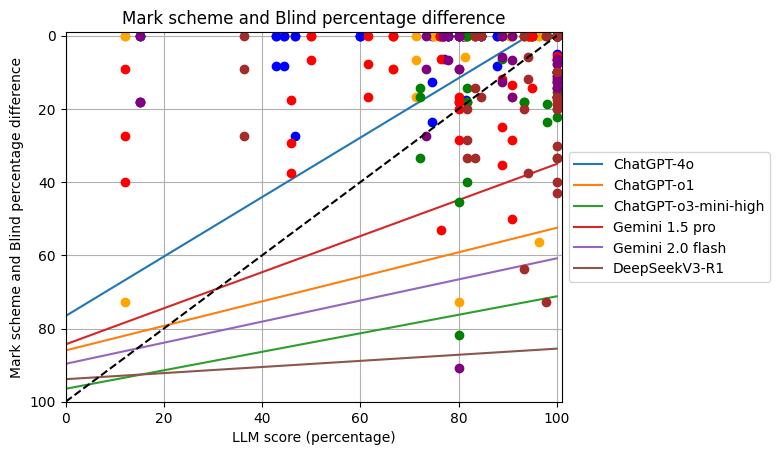

In [36]:
#plot diffs against scores

# add best fit lines
m1, b1, rms1 = plot_regression(GPT4oCM_3perc, GPT4o_diff, 'ChatGPT-4o')
m2, b2, rms2 = plot_regression(GPTo1CM_3perc, GPTo1_diff, 'ChatGPT-o1')
m3, b3, rms3 = plot_regression(GPTo3CM_3perc, GPTo3_diff, 'ChatGPT-o3-mini-high')
m4, b4, rms4 = plot_regression(Gem15pCM_3perc, Gem15p_diff, 'Gemini 1.5 pro')
m5, b5, rms5 = plot_regression(Gem20fCM_3perc, Gem20f_diff, 'Gemini 2.0 flash')
m6, b6, rms6 = plot_regression(DSR1CM_3perc, DSR1_diff, 'DeepSeekV3-R1')


plt.plot(GPT4oCM_3perc, GPT4o_diff, 'o', color='blue')
plt.plot(GPTo1CM_3perc, GPTo1_diff, 'o', color='orange')
plt.plot(GPTo3CM_3perc, GPTo3_diff, 'o', color='green')
plt.plot(Gem15pCM_3perc, Gem15p_diff, 'o', color='red')
plt.plot(Gem20fCM_3perc, Gem20f_diff, 'o', color='purple')
plt.plot(DSR1CM_3perc, DSR1_diff, 'o', color='brown')
plt.xlabel('LLM score (percentage)')
plt.ylabel('Mark scheme and Blind percentage difference')
plt.title('Mark scheme and Blind percentage difference')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# plot y=x line
plt.plot([0, 100], [100, 0], 'k--', label='y=x')  # Diagonal line for reference

plt.ylim(100, -1) 
plt.xlim(0, 101)
#plt.savefig('Mark_scheme_vs_Blind.png', dpi=300, bbox_inches='tight')



#print lines of best fit
print("Mark Scheme vs Blind:")
print(f"ChatGPT-4o: y = {m1:.2f}x + {b1:.2f}, RMSE = {rms1:.2f}")
print(f"ChatGPT-o1: y = {m2:.2f}x + {b2:.2f}, RMSE = {rms2:.2f}")
print(f"ChatGPT-o3-mini-high: y = {m3:.2f}x + {b3:.2f}, RMSE = {rms3:.2f}")
print(f"Gemini 1.5 pro: y = {m4:.2f}x + {b4:.2f}, RMSE = {rms4:.2f}")
print(f"Gemini 2.0 flash: y = {m5:.2f}x + {b5:.2f}, RMSE = {rms5:.2f}")
print(f"DeepSeekV3-R1: y = {m6:.2f}x + {b6:.2f}, RMSE = {rms6:.2f}")



In [37]:
# same but with raw mark
LLM4oCM_owoms = np.concatenate((np.array(LLM4oCM[0:3]).flatten(), np.array(LLM4oEM[0:3]).flatten(), np.array(LLM4oQM[0:3]).flatten()))
LLMG15CM_owoms = np.concatenate((np.array(LLMG15CM[0:3]).flatten(), np.array(LLMG15EM[0:3]).flatten(), np.array(LLMG15QM[0:3]).flatten()))
LLMo1_owoms = np.concatenate((np.array(LLMo1CM[0:3]).flatten(), np.array(LLMo1EM[0:3]).flatten(), np.array(LLMo1QM[0:3]).flatten()))
LLMG20CM_owoms = np.concatenate((np.array(LLMG20CM[0:3]).flatten(), np.array(LLMG20EM[0:3]).flatten(), np.array(LLMG20QM[0:3]).flatten()))
LLMDSR1CM_owoms = np.concatenate((np.array(LLMDSR1CM[0:3]).flatten(), np.array(LLMDSR1EM[0:3]).flatten(), np.array(LLMDSR1QM[0:3]).flatten()))
LLMo3CM_owoms = np.concatenate((np.array(LLMo3CM[0:3]).flatten(), np.array(LLMo3EM[0:3]).flatten(), np.array(LLMo3QM[0:3]).flatten()))

LLM4oCM_oms = np.concatenate((np.array(LLM4oCM[3:6]).flatten(), np.array(LLM4oEM[3:6]).flatten(), np.array(LLM4oQM[3:6]).flatten()))
LLMG15CM_oms = np.concatenate((np.array(LLMG15CM[3:6]).flatten(), np.array(LLMG15EM[3:6]).flatten(), np.array(LLMG15QM[3:6]).flatten()))
LLMo1_oms = np.concatenate((np.array(LLMo1CM[3:6]).flatten(), np.array(LLMo1EM[3:6]).flatten(), np.array(LLMo1QM[3:6]).flatten()))
LLMG20CM_oms = np.concatenate((np.array(LLMG20CM[3:6]).flatten(), np.array(LLMG20EM[3:6]).flatten(), np.array(LLMG20QM[3:6]).flatten()))
LLMDSR1CM_oms = np.concatenate((np.array(LLMDSR1CM[3:6]).flatten(), np.array(LLMDSR1EM[3:6]).flatten(), np.array(LLMDSR1QM[3:6]).flatten()))
LLMo3CM_oms = np.concatenate((np.array(LLMo3CM[3:6]).flatten(), np.array(LLMo3EM[3:6]).flatten(), np.array(LLMo3QM[3:6]).flatten()))


In [38]:
# get LLM scored 
GPT4o_m = np.concatenate((GPT4oCMmmt, GPT4oEMmmt, GPT4oQMmmt))
GPTo1_m = np.concatenate((GPTo1CMmmt, GPTo1EMmmt, GPTo1QMmmt))
GPTo3_m = np.concatenate((GPTo3CMmmt, GPTo3EMmmt, GPTo3QMmmt))
Gem15p_m = np.concatenate((Gem15pCMmmt, Gem15pEMmmt, Gem15pQMmmt))
Gem20f_m = np.concatenate((Gem20fCMmmt, Gem20fEMmmt, Gem20fQMmmt))
DSR1_m = np.concatenate((DSR1CMmmt, DSR1EMmmt, DSR1QMmmt))

# make them all 3 times
GPT4o_m3 = np.repeat(GPT4o_m, 3)
GPTo1_m3 = np.repeat(GPTo1_m, 3)
GPTo3_m3 = np.repeat(GPTo3_m, 3)
Gem15p_m3 = np.repeat(Gem15p_m, 3)
Gem20f_m3 = np.repeat(Gem20f_m, 3)
DSR1_m3 = np.repeat(DSR1_m, 3)

#get differences
GPT4o_diff = abs(GPT4o_m3 - LLM4oCM_owoms)
GPTo1_diff = abs(GPTo1_m3 - LLMo1_owoms)
GPTo3_diff = abs(GPTo3_m3 - LLMo3CM_owoms)
Gem15p_diff = abs(Gem15p_m3 - LLMG15CM_owoms)
Gem20f_diff = abs(Gem20f_m3 - LLMG20CM_owoms)
DSR1_diff = abs(DSR1_m3 - LLMDSR1CM_owoms)



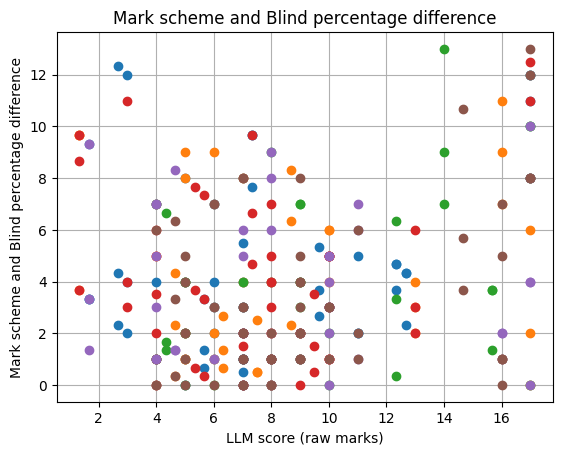

In [41]:
#plot
plt.plot(GPT4o_m3, GPT4o_diff, 'o', label='ChatGPT-4o')
plt.plot(GPTo1_m3, GPTo1_diff, 'o', label='ChatGPT-o1')
plt.plot(GPTo3_m3, GPTo3_diff, 'o', label='ChatGPT-o3-mini-high')
plt.plot(Gem15p_m3, Gem15p_diff, 'o', label='Gemini 1.5 pro')
plt.plot(Gem20f_m3, Gem20f_diff, 'o', label='Gemini 2.0 flash')
plt.plot(DSR1_m3, DSR1_diff, 'o', label='DeepSeekV3-R1')
plt.xlabel('LLM score (raw marks)')

plt.ylabel('Mark scheme and Blind percentage difference')
plt.title('Mark scheme and Blind percentage difference')
plt.grid(True)

plt.savefig('Mark_scheme_vs_Blind_raw.png', dpi=300, bbox_inches='tight')
